### Project Title ECG-ML-Classifier 



In [119]:
# loading of Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib_inline
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [66]:
#loading of Dataset i removed headers because is not important 
abnormal = pd.read_csv(r"D:\Projects\ML_ECG_CLASSIFIER\ptbdb_abnormal.csv", header=None)
normal = pd.read_csv(r"D:\Projects\ML_ECG_CLASSIFIER\ptbdb_normal.csv", header=None)
print('Abnormal heart data information')
abnormal.info()

print('Normal heart data information')
normal.info()

Abnormal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
Normal heart data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB


### CHECKING THE BASIC STATISTICS OF THE DATASET

In [67]:
#concantenating the two dataframes 
ECG_data=pd.concat([normal,abnormal],ignore_index=True,sort=False)
ECG_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
#checking the info for the dtatset
ECG_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.487680,0.114305,0.000000,0.030116,0.065024,0.060917,0.050992,0.053388,0.051677,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.460381,0.122178,0.009296,0.125719,0.220009,0.267375,0.262948,0.260292,0.274015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.755102,0.135116,0.000000,0.285714,0.331457,0.256861,0.258269,0.253343,0.277270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.706176,0.323144,0.101684,0.013724,0.222707,0.285714,0.295696,0.325016,0.350593,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
ECG_data.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
14542,1.000000,0.611613,0.325806,0.158710,0.092903,0.078387,0.057742,0.047419,0.040323,0.031290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14543,0.977826,0.820984,0.513791,0.200108,0.163872,0.157923,0.182261,0.155219,0.153056,0.156301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14544,0.946755,1.000000,0.976705,0.900166,0.758735,0.600666,0.475874,0.377704,0.266223,0.227953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14545,0.956500,0.763441,0.383187,0.170088,0.231672,0.188661,0.096774,0.069892,0.083089,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14546,0.973607,0.504399,0.034604,0.005279,0.000000,0.117889,0.275073,0.303226,0.329032,0.347214,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14551,0.997886,0.700317,0.464059,0.318182,0.233615,0.184989,0.124207,0.082981,0.087738,0.063953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
ECG_data.shape

(14552, 188)

In [71]:
ECG_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [72]:
ECG_data.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

### Performing EDA

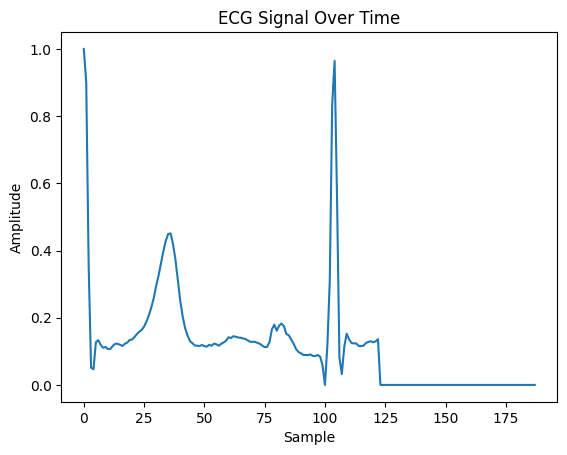

In [73]:
# Visualizing ECG signal over time
plt.plot(ECG_data.iloc[0, :])  # Plot the first row (assuming each row represents a sample)
plt.title('ECG Signal Over Time')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


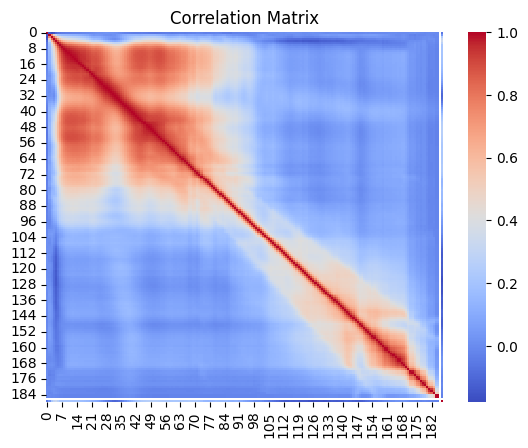

In [74]:
# we taking a look at how each data point relates to each other 
correlation_matrix = ECG_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


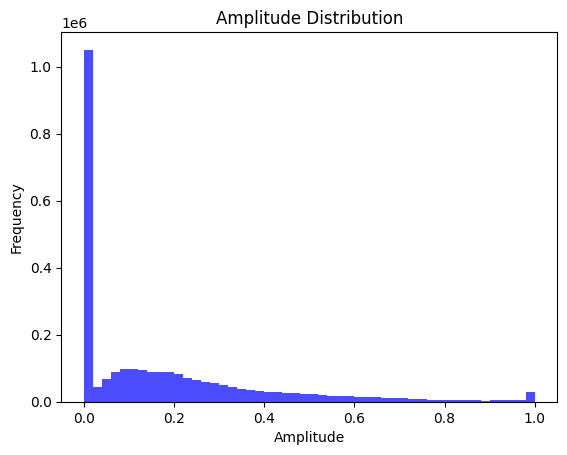

In [75]:
# visualizing the amplitude frquency distribution
plt.hist(ECG_data.values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Amplitude Distribution')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.show()


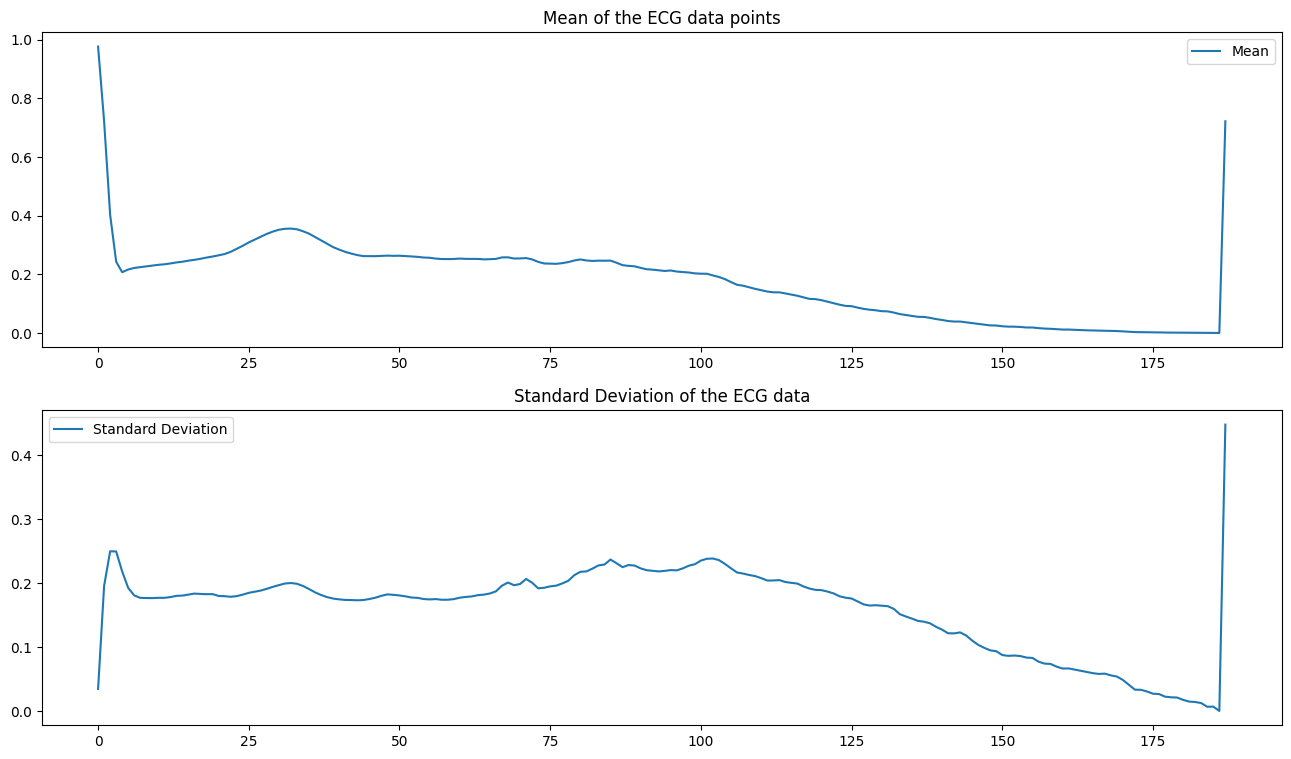

In [76]:
#Visualizing the mean and std of the datapoints
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.plot(ECG_data.mean(), label='Mean')
ax1.set_title("Mean of the ECG data points")
ax1.legend()

ax2.plot(ECG_data.std(), label='Standard Deviation')
ax2.set_title("Standard Deviation of the ECG data")
ax2.legend()

plt.show()

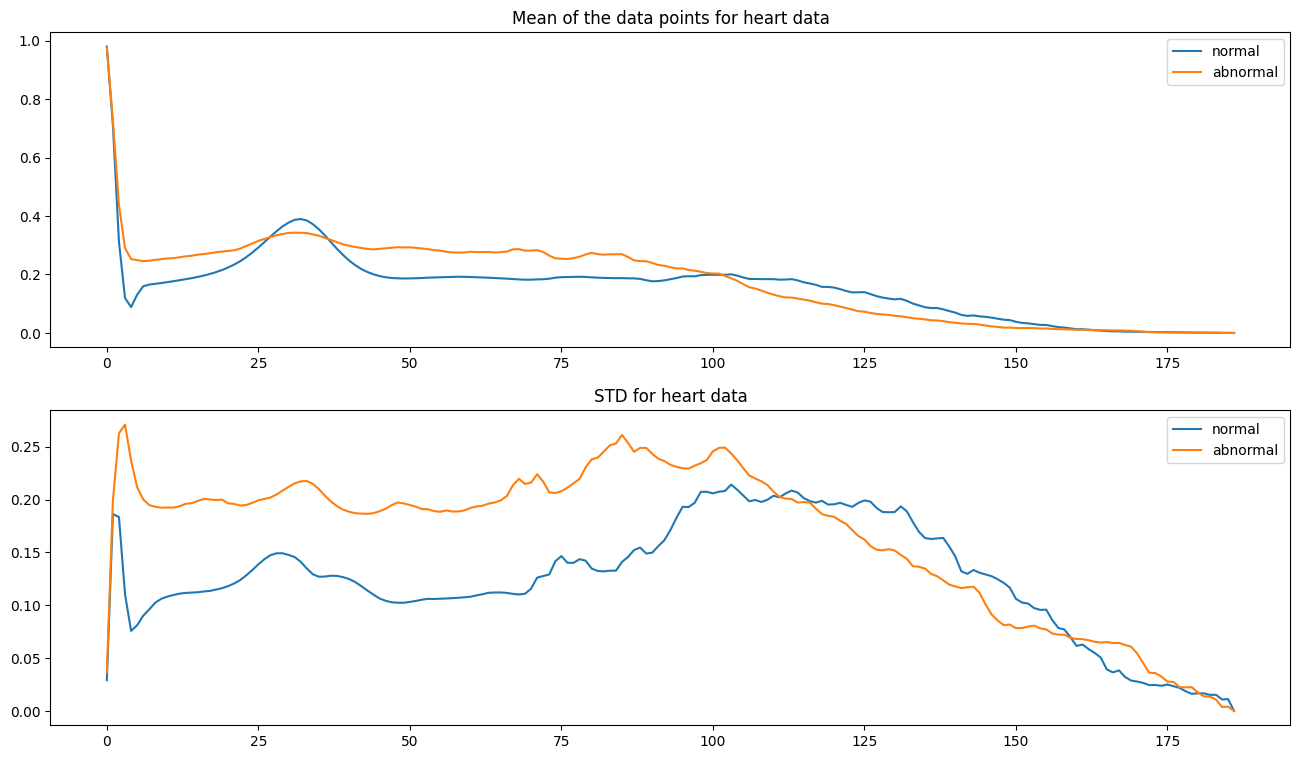

In [77]:
# A dive into the mean and std of the normal and abnormal heart rates 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.plot(normal.loc[:, :186].mean(), label='normal')
ax1.plot(abnormal.loc[:, :186].mean(), label='abnormal')
ax1.set_title("Mean of the data points for heart data")
ax1.legend()

ax2.plot(normal.loc[:, :186].std(), label='normal')
ax2.plot(abnormal.loc[:, :186].std(), label='abnormal')
ax2.legend()
ax2.set_title("STD for heart data")

plt.show()


## Data preprocessing 

In [78]:
#checking for duplicate data after concatenation 
ECG_data.duplicated().sum()

7

In [79]:
# duplicated data droped 
ECG_data.drop_duplicates( keep="first", inplace=True)

In [80]:
#re-checking duplicated data and is now zero
ECG_data.duplicated().sum()


0

In [81]:
#checking for missing values 
ECG_data.isnull().values.sum()

0

In [84]:
# Calculate Z-scores for each data point
z_scores = stats.zscore(ECG_data)

# setting a threshold for identifying outliers (e.g., Z-score > 3 or Z-score < -3)
threshold = 3

# Identify outliers
outliers = (abs(z_scores) > threshold).any(axis=1)

# Print the indices of rows containing outliers
print("Indices of rows with outliers:")
print(ECG_data.index[outliers])

Indices of rows with outliers:
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,
               10,
            ...
            14541, 14542, 14543, 14545, 14546, 14547, 14548, 14549, 14550,
            14551],
           dtype='int64', length=13219)



It appears that the identified outliers are located in the rows with indices ranging from 0 to 14551. These indices correspond to the rows in my ECG_data DataFrame that have data points considered as outliers based on the Z-score threshold.

In [93]:
# Specifying the threshold
z_threshold = 3

# Calculate Z-scores for each data point
z_scores = np.abs(zscore(ECG_data))

# Create a mask for outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

# Replace outliers with the median
median_values = ECG_data.median()
ECG_data_cleaned = ECG_data.copy()
ECG_data_cleaned[outlier_mask] = median_values

ECG_data_cleaned = 

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.0,0.740092,0.371809,0.168016,0.136059,0.159399,0.167457,0.171482,0.17734,0.180328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [95]:
#checking for missing data after handling outliers 
missing_data = ECG_data_cleaned.isnull().values.sum()

# Display missing data
print(missing_data)


0


In [97]:
# checking the class and distribution of the dataset and making sure we have only two classes
ECG_data_cleaned.loc[:,187].value_counts()

1.0    14385
0.0      160
Name: 187, dtype: int64

In [99]:
# Separate features and target variable
X = ECG_data_cleaned.drop(columns=[187])
y = ECG_data_cleaned[187]

In [106]:
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after balancing
print(y_resampled.value_counts())

1.0    14385
0.0    14385
Name: 187, dtype: int64


we can see that our dataset is now balanced

In [107]:

#spliting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [110]:
#scaling of the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Training 


### Support Vector Classification.

In [125]:
# Split the training data into training and validation sets this is done so we can also have the result of accuracy on the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [126]:
# Create a Support Vector Machine Classifier
svm_classifier = SVC(random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [128]:
# Make predictions on the validation set
y_pred_val = svm_classifier.predict(X_val)

# Evaluate the performance on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
classification_report_val = classification_report(y_val, y_pred_val)

# Display the results
print(f"Support Vector Machine Classifier Validation Accuracy: {accuracy_val:.4f}")
print("Validation Classification Report:")
print(classification_report_val)

Support Vector Machine Classifier Validation Accuracy: 0.9924
Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2312
         1.0       1.00      0.98      0.99      2292

    accuracy                           0.99      4604
   macro avg       0.99      0.99      0.99      4604
weighted avg       0.99      0.99      0.99      4604




The results of the Support Vector Machine (SVM) Classifier on the validation dataset are as follows:

Validation Accuracy: 0.9924: This indicates that the model correctly classified approximately 99.24% of the samples in the validation dataset.

Precision: Precision is a measure of the accuracy of the positive predictions. In this context:

For class 0.0, precision is 0.99, meaning that 99% of the samples predicted as class 0.0 are actually of class 0.0.
For class 1.0, precision is 1.00, indicating that all samples predicted as class 1.0 are indeed of class 1.0.
Recall: Recall (Sensitivity or True Positive Rate) is a measure of the ability of the model to capture all the relevant cases. In this context:

For class 0.0, recall is 1.00, meaning that the model identified all actual class 0.0 samples.
For class 1.0, recall is 0.98, indicating that the model captured 98% of the actual class 1.0 samples.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

For class 0.0, the F1-score is 0.99.
For class 1.0, the F1-score is 0.99.
Support: Support indicates the number of actual occurrences of each class in the specified dataset. In this case, there are 2312 samples of class 0.0 and 2292 samples of class 1.0 in the validation dataset.

Macro Avg and Weighted Avg: These are averages of the precision, recall, and F1-score values. Macro avg treats all classes equally, while weighted avg considers the number of samples in each class.

In summary, the SVM Classifier maintained high accuracy and performed well in terms of precision, recall, and F1-score for both classes on the validation dataset. The model appears to generalize well to new, unseen data.

In [129]:
# Make predictions on the test set
y_pred_test = svm_classifier.predict(X_test)

# Evaluate the performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_report_test = classification_report(y_test, y_pred_test)

# Display the results
print(f"\nSupport Vector Machine Classifier Test Accuracy: {accuracy_test:.4f}")
print("Test Classification Report:")
print(classification_report_test)


Support Vector Machine Classifier Test Accuracy: 0.9932
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2870
         1.0       1.00      0.99      0.99      2884

    accuracy                           0.99      5754
   macro avg       0.99      0.99      0.99      5754
weighted avg       0.99      0.99      0.99      5754



Interpretation of Result
Test Accuracy: 0.9932: This indicates that the model correctly classified approximately 99.32% of the samples in the test dataset.

Precision: Precision is a measure of the accuracy of the positive predictions. In this context:

For class 0.0, precision is 0.99, meaning that 99% of the samples predicted as class 0.0 are actually of class 0.0.
For class 1.0, precision is 1.00, indicating that all samples predicted as class 1.0 are indeed of class 1.0.
Recall: Recall (Sensitivity or True Positive Rate) is a measure of the ability of the model to capture all the relevant cases. In this context:

For class 0.0, recall is 1.00, meaning that the model identified all actual class 0.0 samples.
For class 1.0, recall is 0.99, indicating that the model captured 99% of the actual class 1.0 samples.
F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

For class 0.0, the F1-score is 0.99.
For class 1.0, the F1-score is 0.99.
Support: Support indicates the number of actual occurrences of each class in the specified dataset. In this case, there are 2870 samples of class 0.0 and 2884 samples of class 1.0.

Macro Avg and Weighted Avg: These are averages of the precision, recall, and F1-score values. Macro avg treats all classes equally, while weighted avg considers the number of samples in each class.

In summary, the SVM Classifier achieved high accuracy and performed well in terms of precision, recall, and F1-score for both classes on the test dataset. The model appears to be effective in distinguishing between the two classes.